# Characterize potential AGN with optical variability

Author: Melissa Graham

Attempt to characterize the variability in potential AGN.

## Set up and read in data

All the files have headers which explain the columns.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time

Plotting parameters for nightly-epoch light curves.

In [2]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

### Load the candidate lightcurves

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

### Load the lightcurve parameters data

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
paramLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
paramLC_tspan = np.loadtxt(fnm, dtype='float', usecols=(2))
paramLC_tspan_g = np.loadtxt(fnm, dtype='float', usecols=(3))
paramLC_tspan_r = np.loadtxt(fnm, dtype='float', usecols=(4))
paramLC_tspan_i = np.loadtxt(fnm, dtype='float', usecols=(5))
paramLC_minmag = np.loadtxt(fnm, dtype='float', usecols=(6))
paramLC_minmag_g = np.loadtxt(fnm, dtype='float', usecols=(7))
paramLC_minmag_r = np.loadtxt(fnm, dtype='float', usecols=(8))
paramLC_minmag_i = np.loadtxt(fnm, dtype='float', usecols=(9))
paramLC_amp = np.loadtxt(fnm, dtype='float', usecols=(10))
paramLC_amp_g = np.loadtxt(fnm, dtype='float', usecols=(11))
paramLC_amp_r = np.loadtxt(fnm, dtype='float', usecols=(12))
paramLC_amp_i = np.loadtxt(fnm, dtype='float', usecols=(13))
paramLC_neps = np.loadtxt(fnm, dtype='int', usecols=(14))
paramLC_neps_g = np.loadtxt(fnm, dtype='int', usecols=(15))
paramLC_neps_r = np.loadtxt(fnm, dtype='int', usecols=(16))
paramLC_neps_i = np.loadtxt(fnm, dtype='int', usecols=(17))
del fnm

### Load the results of cross-matching with DESI Legacy Survey DR10

In [5]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

Get the index in the cross-match arrays for each candidate in the light curve parameters arrays.

In [6]:
paramLC_xindex = np.zeros(len(paramLC_candid), dtype='int') - 1

for c, cand in enumerate(paramLC_candid):
    tx = np.where(lsdr10xm_candid == cand)[0]
    paramLC_xindex[c] = tx[0]
    del tx

tx = np.where(paramLC_xindex < 0)[0]
print('should be zero if all indexed:', len(tx))
del tx

should be zero if all indexed: 0


## AGN identified using relaxed constraints

First, identify potential AGN with fairly relaxed constraints and just see what they're like.

Use the same two-year constraint on the time span, and keep the requirement of a nuclear match to a Legacy Survey galaxy.

Set new constraints on the minimum magnitude, maximum amplitude, and minimum number of epochs.

These constraints are in ANY filter.

In [7]:
min_tspan = 720
max_minmag = 23
min_amp = 0.2
min_neps = 40
tx = np.where(((paramLC_tspan_g >= min_tspan) | (paramLC_tspan_r >= min_tspan) | (paramLC_tspan_i >= min_tspan)) &
              ((paramLC_minmag_g <= max_minmag) | (paramLC_minmag_r <= max_minmag) | (paramLC_minmag_i <= max_minmag)) & 
              ((paramLC_amp_g >= min_amp) | (paramLC_amp_r >= min_amp) | (paramLC_amp_i >= min_amp)) & 
              ((paramLC_neps_g >= min_neps) | (paramLC_neps_r >= min_neps) | (paramLC_neps_i >= min_neps)) & 
              (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
del min_tspan, max_minmag, min_amp, min_neps
print(len(tx))

227


Plot histograms of the light curve parameters.

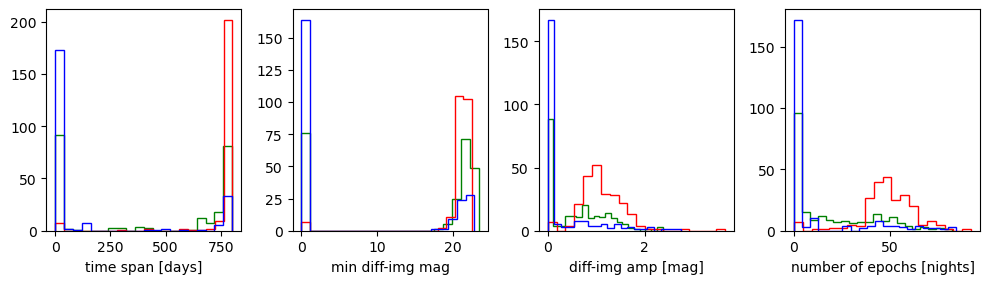

In [8]:
nrow = 1
ncol = 4
fig, ax = plt.subplots( nrow, ncol, figsize=(10, 3), sharex=False, sharey=False )

ax[0].hist(paramLC_tspan_g[tx], bins=20, histtype='step', color=all_fcolors[0])
ax[0].hist(paramLC_tspan_r[tx], bins=20, histtype='step', color=all_fcolors[1])
ax[0].hist(paramLC_tspan_i[tx], bins=20, histtype='step', color=all_fcolors[2])
ax[0].set_xlabel('time span [days]')

ax[1].hist(paramLC_minmag_g[tx], bins=20, histtype='step', color=all_fcolors[0])
ax[1].hist(paramLC_minmag_r[tx], bins=20, histtype='step', color=all_fcolors[1])
ax[1].hist(paramLC_minmag_i[tx], bins=20, histtype='step', color=all_fcolors[2])
ax[1].set_xlabel('min diff-img mag')

ax[2].hist(paramLC_amp_g[tx], bins=20, histtype='step', color=all_fcolors[0])
ax[2].hist(paramLC_amp_r[tx], bins=20, histtype='step', color=all_fcolors[1])
ax[2].hist(paramLC_amp_i[tx], bins=20, histtype='step', color=all_fcolors[2])
ax[2].set_xlabel('diff-img amp [mag]')

ax[3].hist(paramLC_neps_g[tx], bins=20, histtype='step', color=all_fcolors[0])
ax[3].hist(paramLC_neps_r[tx], bins=20, histtype='step', color=all_fcolors[1])
ax[3].hist(paramLC_neps_i[tx], bins=20, histtype='step', color=all_fcolors[2])
ax[3].set_xlabel('number of epochs [nights]')

plt.tight_layout()
plt.show()

Takeaway: candidates that meet these constraints are usually showing most activity in r-band.

Plot histograms of the static-sky cross-match.

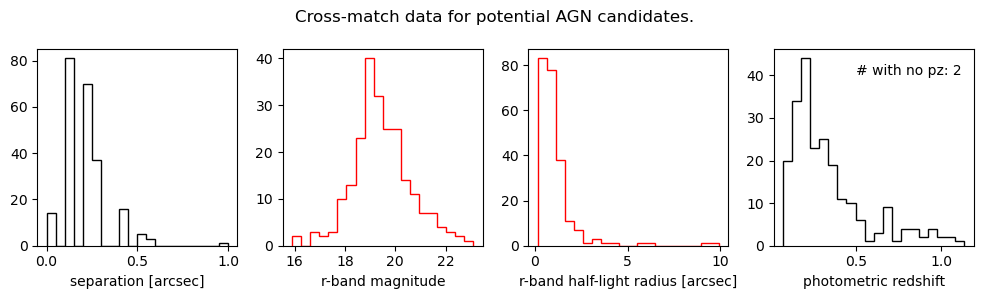

In [9]:
nrow = 1
ncol = 4
fig, ax = plt.subplots( nrow, ncol, figsize=(10, 3), sharex=False, sharey=False )

ax[0].hist(lsdr10xm_sep[paramLC_xindex[tx]], bins=20, histtype='step', color='black')
ax[0].set_xlabel('separation [arcsec]')

ax[1].hist(lsdr10xm_rmag[paramLC_xindex[tx]], bins=20, histtype='step', color=all_fcolors[1])
ax[1].set_xlabel('r-band magnitude')

ax[2].hist(lsdr10xm_shaper[paramLC_xindex[tx]], bins=20, histtype='step', color=all_fcolors[1])
ax[2].set_xlabel('r-band half-light radius [arcsec]')

px = np.where(lsdr10xm_meanpz[paramLC_xindex[tx]] >= 0.0)[0]
ax[3].hist(lsdr10xm_meanpz[paramLC_xindex[tx[px]]], bins=20, histtype='step', color='black')
ax[3].set_xlabel('photometric redshift')
tmp = str(len(tx)-len(px))
ax[3].text(0.5, 40, '# with no pz: '+tmp)
del px, tmp

plt.suptitle('Cross-match data for potential AGN candidates.')
plt.tight_layout()
plt.show()

Compare the static-sky magnitudes with the brightest difference-image magnitudes to see if they're correlated.

220  out of  227  identified potential AGN candidates have detected variability in r-band


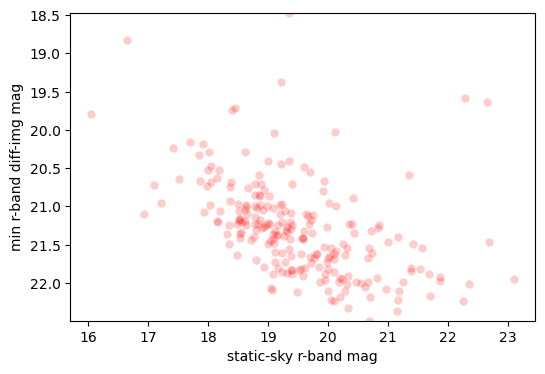

In [10]:
ttx = np.where(paramLC_minmag_r[tx] > 0)[0]
print(len(ttx), ' out of ', len(tx), ' identified potential AGN candidates have detected variability in r-band')

fig = plt.figure(figsize=(6, 4))
plt.plot(lsdr10xm_rmag[paramLC_xindex[tx[ttx]]], paramLC_minmag_r[tx[ttx]], 'o', alpha=0.2, mew=0, color=all_fcolors[1])
plt.ylim([np.max(paramLC_minmag_r[tx[ttx]]), np.min(paramLC_minmag_r[tx[ttx]])])
plt.xlabel('static-sky r-band mag')
plt.ylabel('min r-band diff-img mag')
plt.show()
del ttx

## What to do next?

Which of the above might be useful for the paper?

How else can we present a preliminary characterization of candidate variability that would entice people to use the data for AGN science?